In [2]:
#Importar librerias 
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt 

#Definir funciones
# Funcion Rosenbrock
def rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
    return suma
# Funcion wood
def wood(x):
    return sum((
        100*(x[0]*x[0] - x[1])**2,
        (x[0]-1)**2,
        (x[2]-1)**2,
        90*(x[2]*x[2] - x[3])**2,
        10.1*((x[1]-1)**2 + (x[3]-1)**2),
        19.8*(x[1]-1)*(x[3]-1),
        ))
#ultima funcion - funcion3, l: lambda
def funcion3(l, x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

#Funciones de gradiente y Hessiano 
#Implementar gradiente y hessiano como diferencias finitas
#Gradiente 
def grad(x,xx, function, n, h):
    fprime = np.zeros(n)
    for i in range(n):
        x[i] = x[i]+h
        delante = function(x)
        x[i] = x[i]-2*h
        atras = function(x)
        fprime[i] = (delante-atras)/(2*h)
        x = np.copy(xx)
    return fprime

#Hessiano - desarrollado con diferencias finitas
def hessian(x, xx, function, n, h):
    hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            x[i] = x[i]+h 
            x[j] = x[j]+h
            d = function(x)
            x[j] = x[j]-2*h
            a = function(x)
            #regresar al valor de x original
            x = np.copy(xx)

            x[i] = x[i]-h 
            x[j] = x[j]+h
            dd = function(x)
            x[j] = x[j]-2*h
            aa = function(x)
            #regresar al original
            x = np.copy(xx)
            
            #llenar matriz
            hessian[i][j] = (d-a-dd+aa)/(4*h*h)

    return hessian

def steepest_descent(function, x, alpha, n, h, TOL, iteraciones):
    fun = []
    norm = []
    for i in range(iteraciones):
        #print("sd i: ", i)
        g0 = grad(x, x, function, n, h)
        fun.append(function(x))
        norm.append(np.linalg.norm(g0))
        #reemplazar el valor de x
        x = x-alpha*g0/np.linalg.norm(g0)
        if np.linalg.norm(g0) < TOL:
            #regresar por la tolerancia
            return x, norm, fun,  i+1
    return x, norm, fun, iteraciones

In [6]:
def bisection_with_wolfe_conditions(x, function, alpha, beta, c1, c2, num, max_iter, h):
    n = len(x)
    g0 = grad(x, x, function, n, h)
    d = -g0
    alpha_init = 0
    for i in range(max_iter):
        if (function(x+alpha*d) > function(x) + c1*alpha*np.dot(g0, d)):
            beta = alpha
            alpha = (0.5)*(alpha_init+beta)
        elif np.dot(grad(x+alpha*d, x+alpha*d, function, n, h), d) < c2*np.dot(grad(x, x, function, n, h), d):
            alpha_init = alpha
            if (beta > num):
                alpha = 2*alpha_init
            else:
                alpha = (0.5)*(alpha_init+beta)
        else:
            return alpha
    return alpha

## Función Rosenbrock  n = 2

El minimo es:  [-1.0849178   1.04850599]  con alpha:  0.0125


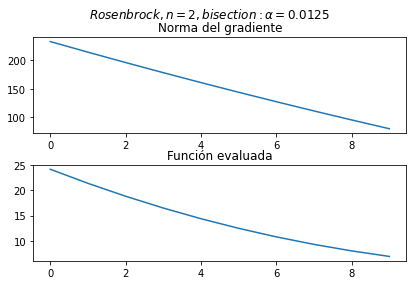

In [24]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
x = [-1.2, 1]
n = 2
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.2
num = 1000
max_iter = 10
h = 0.00001
TOL = 10e-4

alpha_back = bisection_with_wolfe_conditions(x, rosenbrock, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=2, bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_2_bisection_punto_inicial.png')

## Rosenbrock n=2, punto aleatorio

El minimo es:  [0.85490941 0.73189312]  con alpha:  0.0015625


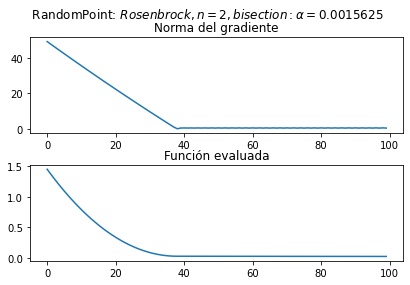

In [21]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 2
x = np.random.rand(n)
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.2
num = 1000
max_iter = 100
h = 0.00001
TOL = 10e-4

alpha_back = bisection_with_wolfe_conditions(x, rosenbrock, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r' RandomPoint: $Rosenbrock, n=2, bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_2_bisection_punto_aleatorio.png')

## Rosenbrock n=100  

El punto minimo es:  [-0.99663419  1.00005895  1.00130138  1.00140485  1.00105722  1.00065041
  1.00034436  1.00016089  1.00006736  1.00002555  1.00000885  1.00000282
  1.00000083  1.00000023  1.00000006  1.00000001  1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.99999999  0.99999995  0.99999979
  0.9999991   0.99999629  0.99998558  0.99994

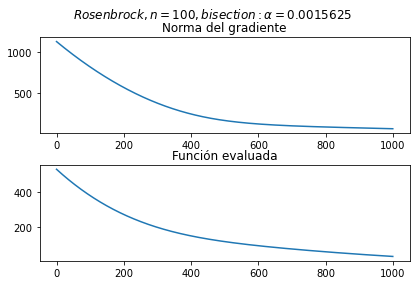

In [27]:
#Para n = 100, funcion rosenbrock con BACKTRACKING
#punto inicial
n = 100
x = np.ones(n)
x[0] = -1.2
x[n-2] = -1.2
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.2
num = 1000
max_iter = 1000
h = 0.00001
TOL = 10e-4


alpha_back = bisection_with_wolfe_conditions(x, rosenbrock, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El punto minimo es: ", x_back, " con alpha igual a: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=100, bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_100_bisection_punto_inicial.png')

El punto minimo es:  [0.77918545 0.66631617 0.54606431 0.59292959 0.56385139 0.61332723
 0.73721264 0.72228679 0.58213858 0.44449922 0.39522729 0.23783989
 0.35759799 0.15386994 0.2037068  0.51487523 0.62281731 0.55859167
 0.32644091 0.27101375 0.49630488 0.67012474 0.6626793  0.60731789
 0.63836921 0.53448552 0.30522287 0.64206679 0.70689883 0.63864747
 0.5085192  0.36971834 0.13213014 0.08199027 0.13037546 0.18602408
 0.11711054 0.38690872 0.21992805 0.14539065 0.49187585 0.64626793
 0.62449113 0.58662835 0.58071212 0.44972786 0.35896256 0.24653768
 0.07328537 0.38796308 0.27728301 0.27844691 0.35314604 0.47123602
 0.33809772 0.1255806  0.05052631 0.41245909 0.3582584  0.26567208
 0.12836727 0.08764234 0.07457192 0.03805871 0.38073523 0.31107412
 0.50826314 0.42805108 0.35491381 0.23658133 0.08969247 0.28171616
 0.47623164 0.47570196 0.44164217 0.40506576 0.32867907 0.37991587
 0.32428287 0.37852062 0.59757879 0.64533952 0.64583815 0.53620063
 0.44103194 0.31310679 0.14354692 0.24977

Text(0.5, 1.0, 'Función evaluada')

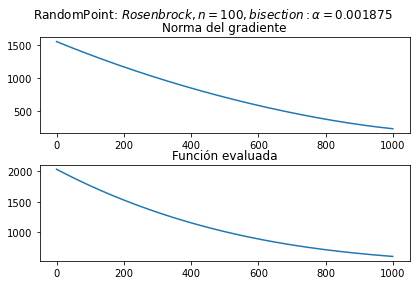

In [34]:
#punto inicial
n = 100
x = np.random.rand(n)
a = 0.03 #alpha_0
b = 2000 #beta
c1 = 10e-4
c2 = 0.9
num = 1000
max_iter = 1000
h = 0.00001
TOL = 10e-4


alpha_back = bisection_with_wolfe_conditions(x, rosenbrock, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El punto minimo es: ", x_back, " con alpha igual a: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'RandomPoint: $Rosenbrock, n=100, bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
#plt.savefig('rosenbrock_n_100_bisection_punto_inicial.png')

## Función de Wood

El minimo es:  [-0.81495775  0.69038231 -0.79038122  0.6556523 ]  con alpha:  0.0005


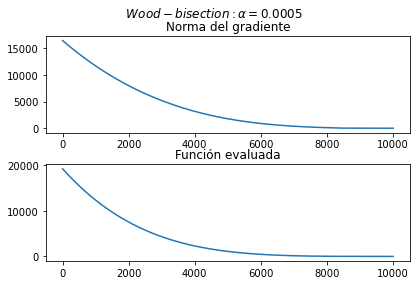

In [71]:
#punto inicial
#Condiciones
n = 4
x = [-3, -1, -3, -1]
a = 0.001 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 10000
max_iter = 10000
h = 0.00001
TOL = 10e-10

alpha_back = bisection_with_wolfe_conditions(x, wood, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r' $Wood -  bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_bisection_punto_inicial.png')

## Wood - punto aleatorio

El minimo es:  [0.99879779 0.99744922 1.00118152 1.00242177]  con alpha:  0.0015625


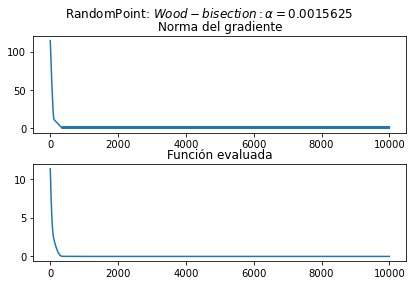

In [74]:
#punto inicial
#Condiciones
n = 4
x = np.random.rand(n)
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 10000
max_iter = 10000
h = 0.00001
TOL = 10e-10

alpha_back = bisection_with_wolfe_conditions(x, wood, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'RandomPoint: $Wood -  bisection: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_bisection_punto_aleatorio.png')

## Última función - funcion3

In [84]:
n = 128
#ultima funcion - funcion3, l: lambda
# para lambda = 1
l = 100
sigma = 5
def funcion3(x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

El minimo es:  [-1.02000000e-03 -9.46941894e-15 -1.03376483e-13 -6.71784692e-14
 -1.02801288e-13  1.34309691e-13  9.66248873e-14  2.64153961e-13
 -1.34433164e-13  8.14059625e-16  5.18440898e-14  4.59756074e-13
 -1.67883506e-13  3.02177118e-14 -1.87346887e-13  6.98477058e-14
 -1.95605975e-14  2.52381414e-14  9.95545447e-15 -9.10556294e-14
 -3.73092357e-14 -1.36706806e-14  3.44855807e-13  3.31480495e-15
 -3.59192465e-14 -1.04010769e-13  2.55467825e-14 -1.97309932e-15
  4.82358169e-14 -1.55493769e-14  2.58166975e-13  3.24882078e-13
 -8.68138395e-14  1.89358810e-13  2.36926184e-13  3.86782104e-13
  3.09450644e-14 -1.72530175e-13  2.10792559e-13 -5.69442473e-15
 -1.53399493e-13 -2.33106581e-14 -1.33369758e-13 -1.93758869e-13
 -4.42304498e-13 -1.50595329e-13 -1.34952703e-13 -1.87964266e-13
 -9.10049173e-14 -2.22573504e-13 -1.01878565e-13 -1.57256757e-13
  5.33503439e-14  1.35676299e-13  1.91687001e-13 -7.98607548e-14
 -2.70626134e-13  2.30668844e-13  7.28261333e-14 -1.69751588e-13
 -1.618466

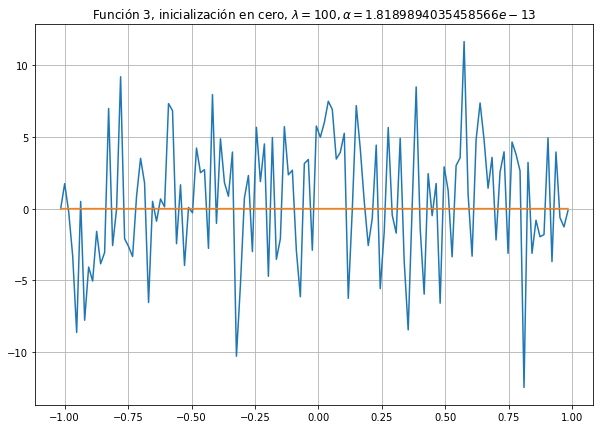

In [85]:
#punto inicial
#Condiciones
n = 128
x = np.zeros(n)
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 10000
max_iter = 100
h = 0.00001
TOL = 10e-10

alpha_back = bisection_with_wolfe_conditions(x, funcion3, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(funcion3, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
#para graficar
t = np.zeros(n)
y = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
for i in range(1, n):
    y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria
#
plt.figure(figsize = (10, 7))
plt.plot(t, y, label = 't, y')
plt.plot(t, x_back, label = r't, $x^{*}$')
plt.grid()
plt.title(r'Función 3, inicialización en cero, $\lambda = 100, \alpha = {} $'.format(alpha_back))
plt.savefig("Funcion3_vector_inicial_bisecta_lamba100.png")

## Punto aleatorio

In [90]:
n = 128
#ultima funcion - funcion3, l: lambda
# para lambda = 1
l = 100
sigma = 5
def funcion3(x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

El minimo es:  [0.97161503 0.15234608 0.3824809  0.9463942  0.85832229 0.51459811
 0.19329073 0.54060014 0.78847744 0.40700682 0.41848459 0.85177479
 0.48993095 0.42109721 0.74728873 0.52602831 0.50133298 0.6142476
 0.32569417 0.80733644 0.78236606 0.52436277 0.26787924 0.83418986
 0.00829754 0.10781086 0.50067046 0.52944617 0.15819308 0.88758521
 0.97715712 0.61638597 0.59508314 0.26474797 0.14583996 0.65248181
 0.39163238 0.50084271 0.891669   0.73778518 0.14763401 0.21709501
 0.10552879 0.29032182 0.41255831 0.90374007 0.67850206 0.70639657
 0.74584674 0.5038764  0.46372152 0.91939048 0.67257647 0.62434216
 0.58229939 0.230486   0.86769724 0.79481592 0.41953236 0.2203556
 0.09835829 0.01784052 0.87406498 0.36376151 0.26391117 0.69446308
 0.62184671 0.80331079 0.56017438 0.66032077 0.52327341 0.8617005
 0.36409283 0.23047113 0.20330098 0.75904687 0.03804784 0.93345325
 0.26638047 0.88998568 0.99131733 0.35199359 0.97368394 0.11510912
 0.64645831 0.67991745 0.48981493 0.77684016 0.900

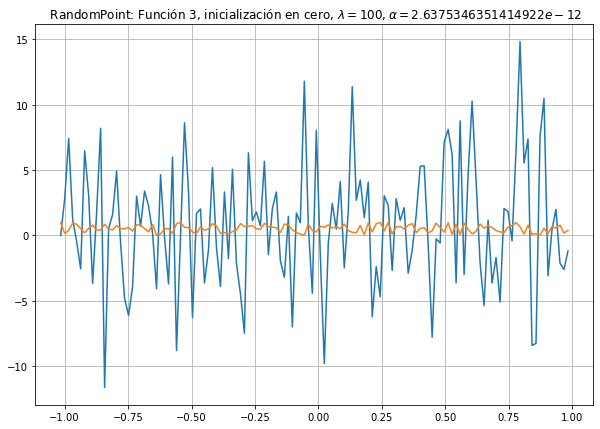

In [91]:
#punto inicial
#Condiciones
n = 128
x = np.random.rand(n)
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 10000
max_iter = 100
h = 0.00001
TOL = 10e-10

alpha_back = bisection_with_wolfe_conditions(x, funcion3, a, b, c1, c2, num, max_iter, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(funcion3, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
#para graficar
t = np.zeros(n)
y = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
for i in range(1, n):
    y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria
#
plt.figure(figsize = (10, 7))
plt.plot(t, y, label = 't, y')
plt.plot(t, x_back, label = r't, $x^{*}$')
plt.grid()
plt.title(r' RandomPoint: Función 3, inicialización en cero, $\lambda = 100, \alpha = {} $'.format(alpha_back))
plt.savefig("Funcion3_vector_aleatoria_bisecta_lamba100.png")